### Admir Makas
### Final Exam, Non-Linear Dynamics

### Problem 1

Write program for fixed point continuation to generate both the stable and unstable branch of following equation:

$\dot{x} = \mu - x^2$

In [1]:
import numpy as np
import sympy as sp
sp.init_printing(use_latex='mathjax')
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

mu = sp.Symbol('mu', real = True)
x = sp.Symbol('x', real = True)

$F$ is defined as:

In [2]:
f = mu-x**2
f

     2
μ - x 

$F_x$ is defined as:

In [3]:
sp.diff(f, x)

-2⋅x

Having defined function $F$ and the corresponding $F_x$, equation for the time marching scheme can be defined as:  

$x_{j+1}^{k+1} = x_{j+1}^{k} - r\frac{\mu_{j+1} - x_{j+1}^{2\  k}}{-2x_{j+1}^{k}}$  

Above expression is implemented in the code below to generate the sequential continuation.  
Relaxation paramater $r$ is modified as required by varying it from 0 to 1.

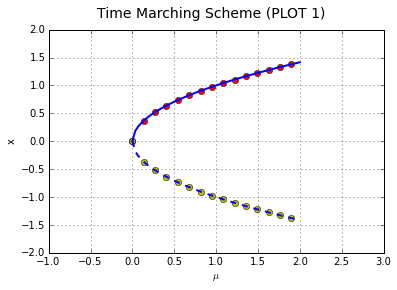

In [4]:
#define mu range from 0 to 2
mu=np.linspace(0, 2, 60)
#mu=np.append(-1, mu)
#print(mu)
#define initial guess for x
x0 = 0.01

x=[]

#print(x)

for i in range(0, len(mu)):
    r=1
    
    if i==0:
        test = x0 - r*((mu[i] - x0**2)/(-2*x0))
        check1 = mu[i]-test**2
        check2 = mu[i]-x0**2
    else:
        test = x[i-1] - r*((mu[i] - x[i-1]**2)/(-2*x[i-1]))
        check1 = mu[i]-test**2
        check2 = mu[i]-x[i-1]**2
    
    if check1 < check2:
        val=[]
        val.append(test)
        for k in range (0, 100):
            val.append(val[k] - r*((mu[i] - val[k]**2)/(-2*val[k])))
            break_cond = np.abs(val[k]-val[k-1])
            if break_cond<0.00001:
                break
        x.append(val[k])
        #print('First condition', x)
    else:
        while(check1 > check2):
            if i==0:
                test2 = x0 - r*((mu[i] - x0**2)/(-2*x0))
                check1 = mu[i]-test2**2
                check2 = mu[i]-x0**2
                r=r/2
            else:
                test2 = x[i-1] - r*((mu[i] - x[i-1]**2)/(-2*x[i-1]))
                check1 = mu[i]-test2**2
                check2 = mu[i]-x[i-1]**2
                r=r/2
        val=[]
        val.append(test)
        for k in range (0, 100):
            val.append(val[k] - r*((mu[i] - val[k]**2)/(-2*val[k])))
            break_cond = np.abs(val[k]-val[k-1])
            if break_cond<0.00001:
                break
        x.append(val[k])
        #print('Second Condition', x)
    
#print(x)

x_neg = np.array(x)
#print(x_neg)
fig = plt.figure()
plt.plot(mu[0:len(mu):4], x[0:len(mu):4], 'ro') #time marching scheme
plt.plot(mu[0:len(mu):4], -x_neg[0:len(mu):4], 'yo') #time marching scheme
plt.plot(mu[0:len(mu)], np.sqrt(mu), 'b', linewidth=2) #actual solution
plt.plot(mu[0:len(mu)], -np.sqrt(mu), 'b--', linewidth=2) #actual solution
fig.suptitle('Time Marching Scheme (PLOT 1)', fontsize = 14)
plt.xlabel('$\mu$')
plt.ylabel('x')
plt.axis([-1, 3, -2, 2])
plt.grid()
plt.show()

Based on the time marching equation defined above **PLOT 1** shows the results. However, at the turning point there will be an issue because the denominator will be equal to 0 leading to an undefined condition. Therefore, **PLOT 1** was constructed by mirrorring top curve in order to generate full graph. Since this is a symmetric condition it can be acceptable but not best way to do things.  

Another way to generate bottom curve is to re-run the code with initial $x_0$ being negative. This condition is shown below in **PLOT 2**.

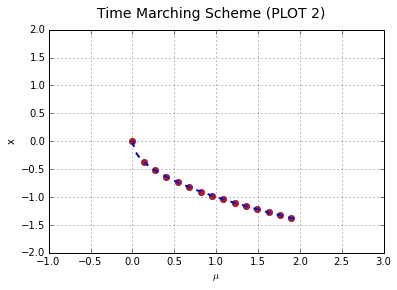

In [5]:
mu=np.linspace(0, 2, 60)
#mu=np.append(-1, mu)
#print(mu)
#define initial guess for x
x0 = -0.01

x=[]

#print(x)

for i in range(0, len(mu)):
    r=1
    
    if i==0:
        test = x0 - r*((mu[i] - x0**2)/(-2*x0))
        check1 = mu[i]-test**2
        check2 = mu[i]-x0**2
    else:
        test = x[i-1] - r*((mu[i] - x[i-1]**2)/(-2*x[i-1]))
        check1 = mu[i]-test**2
        check2 = mu[i]-x[i-1]**2
    
    if check1 < check2:
        val=[]
        val.append(test)
        for k in range (0, 100):
            val.append(val[k] - r*((mu[i] - val[k]**2)/(-2*val[k])))
            break_cond = np.abs(val[k]-val[k-1])
            if break_cond<0.00001:
                break
        x.append(val[k])
        #print('First condition', x)
    else:
        while(check1 > check2):
            if i==0:
                test2 = x0 - r*((mu[i] - x0**2)/(-2*x0))
                check1 = mu[i]-test2**2
                check2 = mu[i]-x0**2
                r=r/2
            else:
                test2 = x[i-1] - r*((mu[i] - x[i-1]**2)/(-2*x[i-1]))
                check1 = mu[i]-test2**2
                check2 = mu[i]-x[i-1]**2
                r=r/2
        val=[]
        val.append(test)
        for k in range (0, 100):
            val.append(val[k] - r*((mu[i] - val[k]**2)/(-2*val[k])))
            break_cond = np.abs(val[k]-val[k-1])
            if break_cond<0.00001:
                break
        x.append(val[k])
        #print('Second Condition', x)
    
#print(x)

fig = plt.figure()
plt.plot(mu[0:len(mu):4], x[0:len(mu):4], 'ro') #time marching scheme
#plt.plot(mu[0:len(mu):4], -x_neg[0:len(mu):4], 'yo') #time marching scheme
#plt.plot(mu[0:len(mu)], np.sqrt(mu), 'b', linewidth=2) #actual solution
plt.plot(mu[0:len(mu)], -np.sqrt(mu), 'b--', linewidth=2) #actual solution
fig.suptitle('Time Marching Scheme (PLOT 2)', fontsize = 14)
plt.xlabel('$\mu$')
plt.ylabel('x')
plt.axis([-1, 3, -2, 2])
plt.grid()
plt.show()

While two methods used above can work, there is still a better way to generate the complete time marching sequence without running into issues at the turning point.  

Instead of using control parameter $\mu$ as the continuation parameter, state variable $x$ can be used. Time marching equation for this case is defined below:  

$\mu_{j+1}^{k+1} = \mu_{j+1}^{k} - r\frac{\mu_{j+1}^{k} - x_{j+1}^{2}}{1}$  

Since denominator is a constant (i.e. $F_{\mu} = 1$) it is not going to cause an issue at the turning point.  
Code using the above equation can be seen below. Variable $x$ is defined from -2 to 2 and the code was executed to generate **PLOT 3** seen below. It is clear that no issues were encountered at the turining point and complete curve was generated.

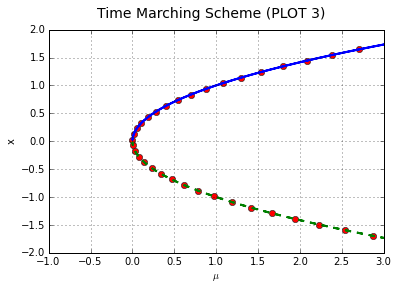

In [218]:
x=np.linspace(-2, 2, 80)
#mu=np.append(-1, mu)
#print(mu)
#define initial guess for x
mu0 = -1.0

mu=[]

for i in range(0, len(x)):
    r=1
    
    if i==0:
        test = mu0 - r*((mu0 - x[i]**2)/(1))
        check1 = test-x[i]**2
        check2 = mu0-x[i]**2
    else:
        test = mu[i-1] - r*((mu[i-1] - x[i]**2)/(1))
        check1 = test-x[i]**2
        check2 = mu[i-1]-x[i]**2
    
    if check1 < check2:
        val=[]
        val.append(test)
        for k in range (0, 10):
            val.append(val[k] - r*((val[k] - x[i]**2)/(1)))
            break_cond = np.abs(val[k]-val[k-1])
            if break_cond<0.00001:
                break
        mu.append(val[k])
        #print('First condition', x)
    else:
        while(check1 > check2):
            if i==0:
                test2 = mu0 - r*((mu0 - x[i]**2)/(1))
                check1 = test2-x[i]**2
                check2 = mu0-x[i]**2
                r=r/2
            else:
                test2 = mu[i-1] - r*((mu[i-1] - x[i]**2)/(1))
                check1 = test2-x[i]**2
                check2 = mu[i-1]-x[i]**2
                r=r/2
        val=[]
        val.append(test)
        for k in range (0, 10):
            val.append(val[k] - r*((val[k] - x[i]**2)/(1)))
            break_cond = np.abs(val[k]-val[k-1])
            if break_cond<0.00001:
                break
        mu.append(val[k])
        #print('Second Condition', x)
    
#print(mu)

#print(x_neg)
fig = plt.figure()
plt.plot(mu[0:len(mu):2], x[0:len(mu):2], 'ro') #time marching scheme
#plt.plot(mu[0:len(mu):4], -x_neg[0:len(mu):4], 'yo') #time marching scheme
plt.plot(mu[0:len(mu)], np.sqrt(mu), 'b', linewidth=2) #actual solution
plt.plot(mu[0:len(mu)], -np.sqrt(mu), 'g--', linewidth=2) #actual solution
fig.suptitle('Time Marching Scheme (PLOT 3)', fontsize = 14)
plt.xlabel('$\mu$')
plt.ylabel('x')
plt.axis([-1, 3, -2, 2])
plt.grid()
plt.show()

### Problem 2  

Apply harmonic balance to obtain subharmonic response of Duffing oscillator equation below.  

$\ddot{x} + (0.01 + \frac{\alpha}{100})\dot{x} + x + \frac{\alpha x^3}{10} = sin(3t)$, where $\alpha = 11$  
State space:  

$\begin{bmatrix}
\dot{x_1}\\
\dot{x_2}\\
\end{bmatrix}$
$=$
$\begin{bmatrix}
x_2\\
-(0.01 + \frac{\alpha}{100})x_2 - x_1 - \frac{\alpha x_1^3}{10} + sin(3t)\\
\end{bmatrix}$

**Using project code yields following result:**

         Current function value: 0.000013
         Iterations: 77
         Function evaluations: 5775
         Gradient evaluations: 113
Values of x after optimization:
[-0.0061286  -0.05260047 -0.09146373 -0.11703544 -0.12557018 -0.11581662
 -0.08920503 -0.0496328  -0.00288582  0.04420919  0.08477502  0.11288143
  0.12441286  0.11767869  0.0936663   0.05589295  0.00988254 -0.03764518
 -0.07975058 -0.11027983 -0.12476382 -0.12107943 -0.09976715 -0.06394982
 -0.01886714  0.0288953   0.07236382  0.10518691  0.12256112  0.12194019
  0.10341534  0.06970141  0.02573162 -0.02206993 -0.0667238  -0.10170632
 -0.12189909 -0.12434303 -0.10867971 -0.07720505 -0.0345259   0.01312088
  0.05877849  0.09577814  0.11870828  0.12420982  0.11147624  0.08237437
  0.04116494]


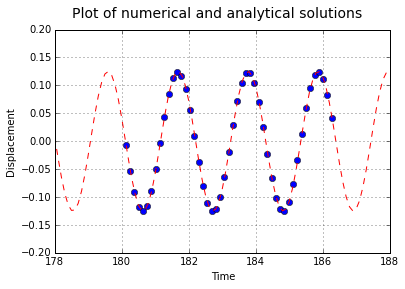

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 1
a = 11

#x0=1*np.ones(N-1)
x0=1*np.sin((2*t)/1)
#x0=2.0*np.sin(1*t)*np.cos(1*t)

f = F*np.sin(3*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (0.01 + a/100)*xdot + x + (a*x**3)/10 - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(0.01 + a/100)*x[1] - x[0] - (a*x[0]**3)/10 + F*np.sin(3*t)])

time=np.linspace(0.0,200,2000)
xinit=np.array([0, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot((57.33*np.pi)+t, sol.x, 'bo') #FFT solution plot
plt.plot(time, x[:,0] , 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([178, 188, -0.2, 0.2])
plt.grid()
plt.show()

Next extract amplitude and frequency of the response by evaluating resulting $x$ in frequency domain.

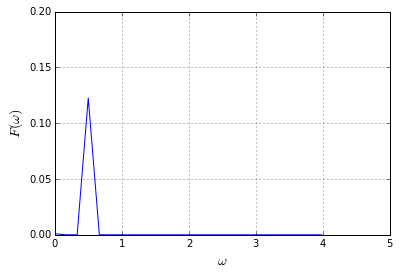

In [8]:
import warnings
warnings.filterwarnings('ignore')

from scipy.fftpack import fft
# Number of samplepoints
N = 50
# sample spacing
T = (2*np.pi)/N
xf = sol.x
#print(xf)
Xf = fft(xf)
#print(Xf)
Yf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(Yf, 2.0/N * np.abs(Xf[0:N/2]))
fig.suptitle('Plot of response in frequency domain', fontsize = 14)
plt.xlabel('$\omega$', fontsize = 14)
plt.ylabel('$F(\omega)$', fontsize = 14)
plt.axis([0, 5, 0, 0.2])
plt.grid()
plt.show()

Based on plot above, amplitude and frequency appear to be the following:  

- Amplitude ($A$) = $0.125$
- Frequecy ($\omega$) = $(0.477)2\pi\ \approx\ 3$  

To verify the above approximation the resulting output of $x$ in time domain can be fitted with a Fourier cosine series as was done in code below:  

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta) + A_4cos(4\omega t + 4\beta) + A_5cos(5\omega t + 5\beta) + A_6cos(6\omega t + 6\beta) + A_7cos(7\omega t + 7\beta) + A_8cos(8\omega t + 8\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$,$A_5$,$A_6$,$A_7$,$A_8$,$\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

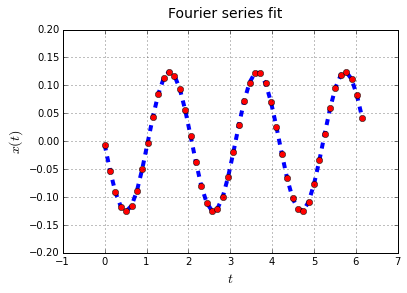

Coefficient values listed below
[ -5.05917751e-04   5.93407271e-06  -4.34079670e-07   1.25075028e-01
   5.72667424e-07   2.31278890e-07  -3.10144150e-07  -4.59705771e-08
  -1.08244519e-07   1.00000148e+00   5.38608347e-01]


In [9]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, A7, A8, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta)\
                   + A7*np.cos(7*omega*t + 7*beta) + A8*np.cos(8*omega*t + 8*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[9]*t + p[10]) + p[2]*np.cos(2*p[9]*t + 2*p[10])\
                + p[3]*np.cos(3*p[9]*t + 3*p[10]) + p[4]*np.cos(4*p[9]*t + 4*p[10])\
                + p[5]*np.cos(5*p[9]*t + 5*p[10]) + p[6]*np.cos(6*p[9]*t + 6*p[10])\
                + p[7]*np.cos(7*p[9]*t + 7*p[10]) + p[8]*np.cos(8*p[9]*t + 8*p[10])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 4)
plt.plot(t, sol.x, 'ro')
plt.axis([-1, 7, -0.2, 0.2])
fig.suptitle('Fourier series fit', fontsize = 14)
plt.xlabel('$t$', fontsize = 14)
plt.ylabel('$x(t)$', fontsize = 14)
plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

The approximated fit is quite good with respect to the numerical solution:

### Fitted equation can be seen below:

In [10]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 3))
A2=sp.nsimplify(round(coeff[2], 3))
A3=sp.nsimplify(round(coeff[3], 3))
A4=sp.nsimplify(round(coeff[4], 3))
A5=sp.nsimplify(round(coeff[5], 3))
A6=sp.nsimplify(round(coeff[6], 3))
A7=sp.nsimplify(round(coeff[7], 3))
A8=sp.nsimplify(round(coeff[8], 3))
omega=sp.nsimplify(round(coeff[9], 2))
beta=sp.nsimplify(round(coeff[10], 3))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta)\
         + A3*sp.cos(3*omega*time + 3*beta) + A4*sp.cos(4*omega*time + 4*beta)\
         + A5*sp.cos(5*omega*time + 5*beta) + A6*sp.cos(6*omega*time + 6*beta)\
         + A7*sp.cos(7*omega*time + 7*beta) + A8*sp.cos(8*omega*time + 8*beta)
ans

   ⎛      1617⎞
cos⎜3⋅t + ────⎟
   ⎝      1000⎠
───────────────
       8       

The above expression agrees with the frequency analysis.

### Expression using exponential Fourier series with optimized Fourier coefficients. 

Finally, yet another way to obtain the expression is to define a exponential fourier series by using the optimized Fourier coefficients. For this method 11 sample points were used and it was sufficient to capture the response.  

A seperate instance of the project code was used for this work.

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(use_latex='mathjax')

N = 11 #define number of sample points
t1=np.linspace(0, 2*np.pi, N)
t1=t1[0:-1]

F = 1
a = 11

#x0=1*np.ones(N-1)
x0=1*np.sin((2*t1)/1)
#x0=2.0*np.sin(1*t)*np.cos(1*t)

f = F*np.sin(3*t1)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (0.01 + a/100)*xdot + x + (a*x**3)/10 - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(0.01 + a/100)*x[1] - x[0] - (a*x[0]**3)/10 + F*np.sin(3*t)])

time=np.linspace(0.0,200,2000)
xinit=np.array([0, 0])
x=odeint(deriv, xinit, time)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 564
         Gradient evaluations: 47
Values of x after optimization:
[-0.01000914 -0.12045288  0.07695123  0.07055616 -0.11682788  0.01000749
  0.12045119 -0.07695291 -0.0705578   0.11682625]


Equation below generated by following expression:  

$x = \frac{1}{N} \sum_{-n}^{n} X_n e^{j \omega_n t}$

In [12]:
Xn = np.fft.fft(sol.x)

Xn1 = (1)/(N-1) * abs(Xn[0:N/2])

t=sp.Symbol('t', real = True)
from IPython.display import display

f_negT = 0
for i in range(len(Xn1)-1, 0, -1):
    #print(i)
    f_neg = Xn1[i]*sp.exp(-1j*i*t)
    f_negT = f_neg + f_negT

#display(f_negT)    
    
f_posT = 0
for i in range(len(Xn1)):
    #print(i)
    f_pos = Xn1[i]*sp.exp(1j*i*t)
    f_posT = f_pos + f_posT
    
fsol = f_negT + f_posT
display(fsol.simplify())

0.00439817117789118⋅cos(1.0⋅t) + 1.44342019872827e-8⋅cos(2.0⋅t) + 0.1250743292
38501⋅cos(3.0⋅t) + 2.41066349617183e-9⋅cos(4.0⋅t) + 8.27686096636221e-7

It is evident by expression above that only one term is relevant and is extracted below.

This result matches what was obtainted by the frequency analysis and fitting function above.

In [13]:
fsol2 = 0.1250743294*sp.cos(3.0*t)
fsol2

0.1250743294⋅cos(3.0⋅t)

Plot below shows the result of the expression above but a shift of $\frac{\pi}{2}$ is added, which is also evident in the fitted equation above.

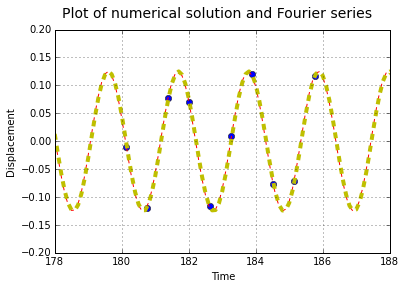

In [14]:
#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot((57.33*np.pi)+t1, sol.x, 'bo') #FFT solution plot
plt.plot(time, x[:,0] , 'r--') #analytical steady state solution to the above posed problem
plt.plot(time, 0.125074329*np.cos(3*time+np.pi/2) , 'y--', linewidth = 4)
fig.suptitle('Plot of numerical solution and Fourier series', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([178, 188, -0.2, 0.2])
plt.grid()
plt.show()

### Floquet analysis  

First define the solution in order to use in analysis

In [220]:
t = sp.Symbol('t', real = True)
phi = sp.Symbol('phi', real = True)
x1 = sp.Symbol('x_1', real = True)
x2 = sp.Symbol('x_2', real = True)
z1 = sp.Symbol('z1', real = True)
z2 = sp.Symbol('z2', real = True)

print('Below is the solution for x')
x = sp.nsimplify(0.1250743294222)*sp.cos(3*t-sp.pi/2)
display(x)

Below is the solution for x


625371647111⋅sin(3⋅t)
─────────────────────
    5000000000000    

### Time to linearize the system.

Define original ODE:

In [178]:
x1dot = x2
x1dot

x₂

In [179]:
x2dot = -(0.01 + 11/100)*x2 - x1 - (11/10)*x1**3
sp.nsimplify(x2dot)

       3            
  11⋅x₁         3⋅x₂
- ────── - x₁ - ────
    10           25 

**Define problem in state space**

In [184]:
f = sp.Matrix([x1dot, x2dot])
sp.nsimplify(f)

⎡         x₂         ⎤
⎢                    ⎥
⎢       3            ⎥
⎢  11⋅x₁         3⋅x₂⎥
⎢- ────── - x₁ - ────⎥
⎣    10           25 ⎦

**Get Jacobian**

In [185]:
F=f.jacobian([x1, x2])
sp.nsimplify(F)

⎡     0          1  ⎤
⎢                   ⎥
⎢       2           ⎥
⎢  33⋅x₁            ⎥
⎢- ────── - 1  -3/25⎥
⎣    10             ⎦

**Substitute solution into the $x_1$ term**

In [186]:
F=F.subs(x1, x)
sp.nsimplify(F)

⎡               0                   1  ⎤
⎢                                      ⎥
⎢                     2                ⎥
⎢  516238400053629⋅sin (3⋅t)           ⎥
⎢- ───────────────────────── - 1  -3/25⎥
⎣      10000000000000000               ⎦

**Define $\phi = 3t$ and apply.**

In [187]:
F = F.subs(3*t, phi)
sp.nsimplify(F)

⎡              0                  1  ⎤
⎢                                    ⎥
⎢                     2              ⎥
⎢  516238400053629⋅sin (φ)           ⎥
⎢- ─────────────────────── - 1  -3/25⎥
⎣     10000000000000000              ⎦

**Next apply double angle formula:**

In [188]:
F = F.subs(sp.sin(phi)**2, 0.5*sp.cos(2*phi) - 0.5)
sp.nsimplify(F)

⎡                     0                         1  ⎤
⎢                                                  ⎥
⎢  51623840005363⋅cos(2⋅φ)   487094039998659       ⎥
⎢- ─────────────────────── - ───────────────  -3/25⎥
⎣      2000000000000000      500000000000000       ⎦

Since a change in variables was added where $\phi = 3t$, another state needs to be added to the above expression, which will yield state space definition seen below.  

$\begin{bmatrix}
\frac{z_1}{d\phi}\\
\frac{z_2}{d\phi}\\
\dot{\phi}
\end{bmatrix}
$
$=$
$\begin{bmatrix}
F
\end{bmatrix}
$
$\begin{bmatrix}
z_1\\
z_2\\
\phi
\end{bmatrix}
$


In [189]:
F1 = F.row_insert(2, sp.Matrix([[0, 0]]))
#isplay(sp.nsimplify(F1))
F2 = F1.col_insert(2, sp.Matrix([[0], [0], [3]]))
display(sp.nsimplify(F2))

⎡                     0                         1    0⎤
⎢                                                     ⎥
⎢  51623840005363⋅cos(2⋅φ)   487094039998659          ⎥
⎢- ─────────────────────── - ───────────────  -3/25  0⎥
⎢      2000000000000000      500000000000000          ⎥
⎢                                                     ⎥
⎣                     0                         0    3⎦

**As a reminder, $\phi = 3t$ and $\dot{\phi} = 3$**  

**In order to switch independent variables do following steps, which will include Chain Rule.**

**Starting with $\dot{\zeta} = A(\theta)\zeta$, need to apply Chain Rule to term $\dot{\zeta}$**

** $\frac{d\zeta}{dt} = \frac{d\zeta}{d\phi} \frac{d\phi}{dt} = \frac{d\zeta}{d\phi} \dot{\phi} = \frac{d\zeta}{d\phi} 3$**  

**Now expression becomes:**  

**$\frac{d\zeta}{d\phi} = \frac{1}{3}A(\phi) \zeta$**

**Expression for $\frac{1}{3}A(\phi)$ seen below**

In [190]:
F2 = (1/3)*F2
sp.nsimplify(F2)

⎡                     0                         1/3   0⎤
⎢                                                      ⎥
⎢  172079466684543⋅cos(2⋅φ)   162364679999553          ⎥
⎢- ──────────────────────── - ───────────────  -1/25  0⎥
⎢     20000000000000000       500000000000000          ⎥
⎢                                                      ⎥
⎣                     0                          0    1⎦

In [191]:
z1 = sp.Symbol('z1', real = True)
z2 = sp.Symbol('z2', real = True)

vec = sp.Matrix([z1, z2, phi])
vec

⎡z₁⎤
⎢  ⎥
⎢z₂⎥
⎢  ⎥
⎣φ ⎦

**Final result for $\frac{1}{3}A(\phi)\zeta$**

In [192]:
Ft = F2*vec
sp.nsimplify(Ft)

⎡                          z₂                          ⎤
⎢                          ──                          ⎥
⎢                          3                           ⎥
⎢                                                      ⎥
⎢   ⎛  172079466684543⋅cos(2⋅φ)   162364679999553⎞   z₂⎥
⎢z₁⋅⎜- ──────────────────────── - ───────────────⎟ - ──⎥
⎢   ⎝     20000000000000000       500000000000000⎠   25⎥
⎢                                                      ⎥
⎣                          φ                           ⎦

In [193]:
Asol = []

for i, item in enumerate(Ft):
       Asol.append(str(item))

display(Asol)

['0.333333333333333*z2',
 'z1*(-0.00860397333422715*cos(2*phi) - 0.324729359999106) - 0.04*z2',
 '1.0*phi']

**After time integration**

In [219]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import sin
from numpy import cos

def deriv(z1_z2_dphi, phi):
    z1, z2, dphi= z1_z2_dphi
    return np.array([eval(Asol[0]),\
                        eval(Asol[1]),\
                            0])

time = np.linspace(0.0, (2*np.pi)/3, 500)
xinit=np.array([1, 0, 0])
x = odeint(deriv, xinit, time)

z1 = sp.Matrix([x[-1, 0], x[-1, 1], x[-1, 2]])
#display(z1)

time = np.linspace(0.0, (2*np.pi)/3, 500)
xinit=np.array([0, 1, 0])
x = odeint(deriv, xinit, time)

z2 = sp.Matrix([x[-1, 0], x[-1, 1], x[-1, 2]])
#display(z2)

time = np.linspace(0.0, (2*np.pi)/3, 500)
xinit=np.array([0, 0, 1])
x = odeint(deriv, xinit, time)

z3 = sp.Matrix([x[-1, 0], x[-1, 1], x[-1, 2]])
#display(z3)

phi1 = sp.Matrix([z1, z2, z3])
phi1 = phi1.reshape(3,3).transpose()

print('Monodromy matrix:')
display(phi1)
print('Eigenvalues:')
display(phi1.eigenvals(rational = False))


Monodromy matrix:


⎡0.777023539430368   0.618362920299435  0.0⎤
⎢                                          ⎥
⎢-0.598572553128768  0.707188759288507  0.0⎥
⎢                                          ⎥
⎣       0.0                 0.0         1.0⎦

Eigenvalues:


{0.999999999999999: 1, 0.742106149359438 - - -0.607384431669456⋅ⅈ: 1, 0.742106
149359438 + 0.607384431669456⋅ⅈ: 1}

**For $\alpha = 11$, There are 3 eigenvalues:**  

**$\lambda_1 = 1$**  
**$\lambda_{2,3} = 0.7421 \pm 0.6074i$**  

**$\lambda_1 = 1$ indicates the steady state solution.**  

**Remaining 2 eigenvalues are in the complex plane where their respective norm is $0.960$. Therefore if the steady state solution is perturbed it will return to the original response.**  

**Solution for $X_0$ is a hyperbolic periodic solution since only one Floquet multiplier is located on the unit circle. The remaining 2 Floquet multipliers are complex conjugates that lie inside the unit circle. As such the solution is asymptotically stable.**

In [29]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')